<a href="https://colab.research.google.com/github/LeonimerMelo/python/blob/main/Recurrent_Neural_Network_(RNN)_Stock_Price_Forcasting_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN based Stock Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load total dataset of Google stock price from 2012 to 2017
dataset_total = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Stock_Price_Total_.csv')
dataset_total

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1273,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
1274,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
1275,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
1276,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


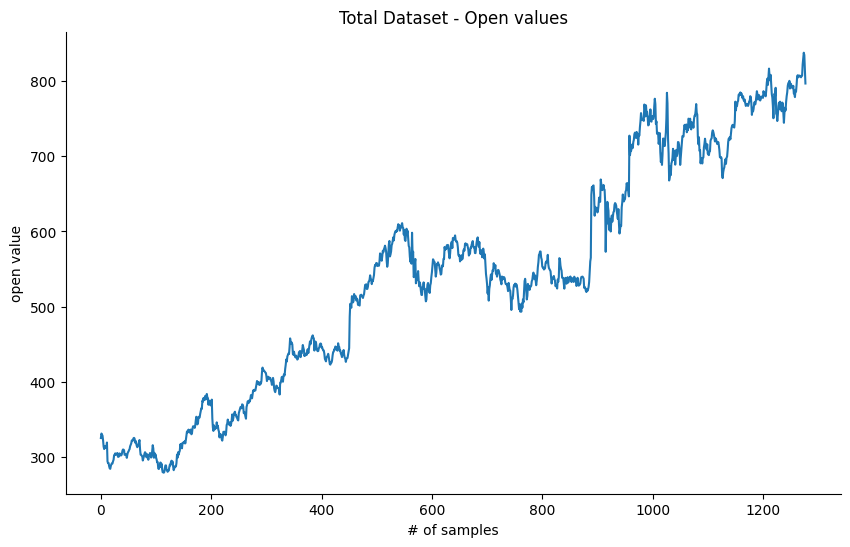

In [ ]:
dataset_total['Open'].plot(kind='line', figsize=(10, 6), title='Total Dataset - Open values')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('# of samples')
plt.ylabel('open value')
plt.show()

In [ ]:
# add new date column
dataset_total['date'] = pd.to_datetime(dataset_total['Date'])
dataset_total

,Date,Open,High,Low,Close,Volume,date
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500",2012-01-03
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400",2012-01-04
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300",2012-01-05
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900",2012-01-06
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800",2012-01-09
...,...,...,...,...,...,...,...
1273,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500",2017-01-25
1274,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900",2017-01-26
1275,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800",2017-01-27
1276,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600",2017-01-30


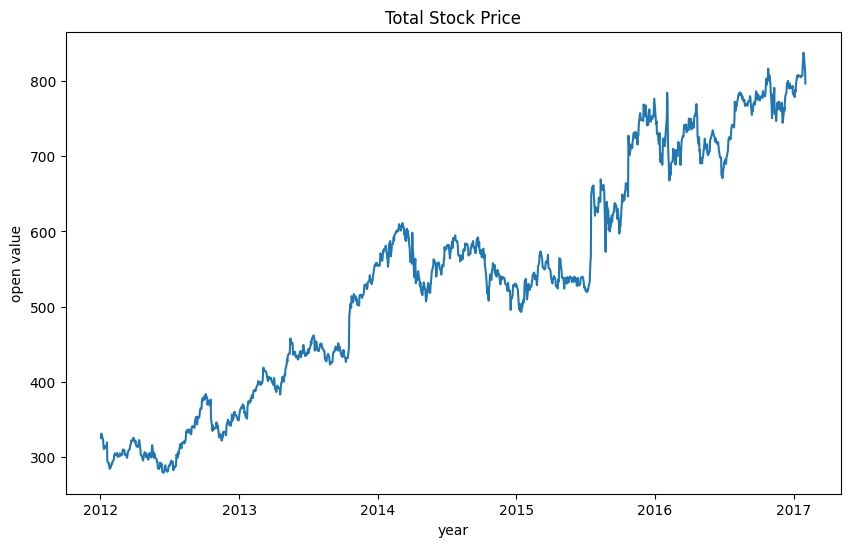

In [ ]:
xs = dataset_total['date']
ys = dataset_total['Open']
xs = np.asarray(xs, dtype='datetime64[s]')
plt.figure(figsize=(10,6))
plt.title('Total Stock Price')
plt.ylabel('open value')
plt.xlabel('year')
plt.plot(xs, ys)
plt.show()

In [ ]:
# Loading train dataset == total dataset - 20 last samples
dataset_train = dataset_total[:-20]
dataset_train

,Date,Open,High,Low,Close,Volume,date
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500",2012-01-03
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400",2012-01-04
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300",2012-01-05
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900",2012-01-06
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800",2012-01-09
...,...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400",2016-12-23
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100",2016-12-27
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800",2016-12-28
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300",2016-12-29


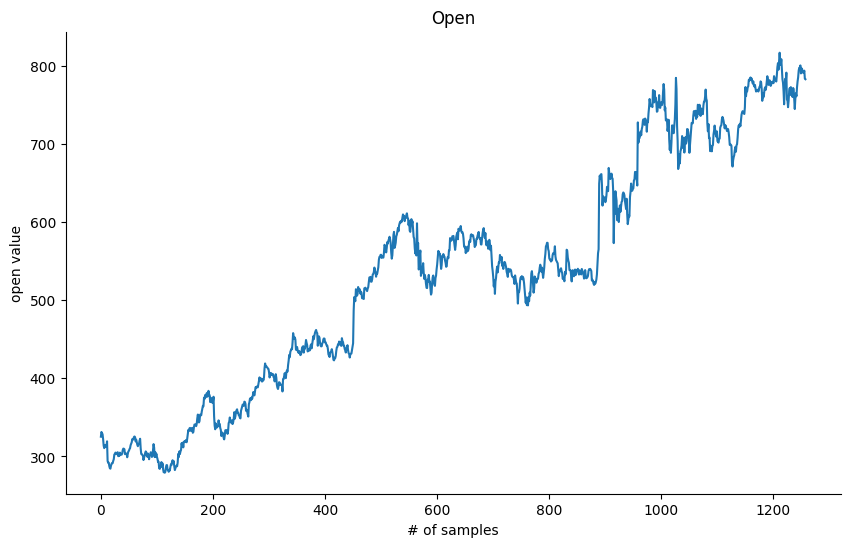

In [ ]:
dataset_train['Open'].plot(kind='line', figsize=(10, 6), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('# of samples')
plt.ylabel('open value')
plt.show()

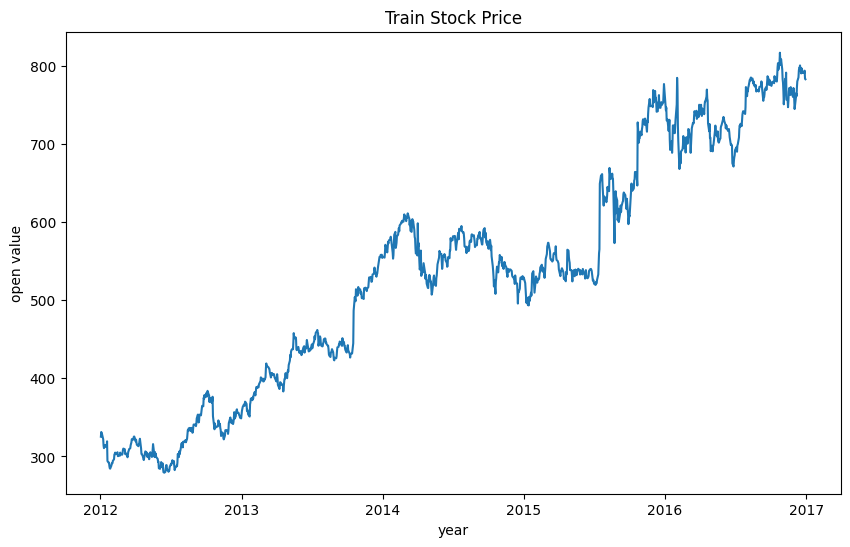

In [ ]:
xs = dataset_train['date']
ys = dataset_train['Open']
xs = np.asarray(xs, dtype='datetime64[s]')
plt.figure(figsize=(10,6))
plt.title('Train Stock Price')
plt.ylabel('open value')
plt.xlabel('year')
plt.plot(xs, ys)
plt.show()

In [ ]:
# extract 'Open' column
train = dataset_train.loc[:, ['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
# Feature MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)

In [ ]:
len(train_scaled)

1258

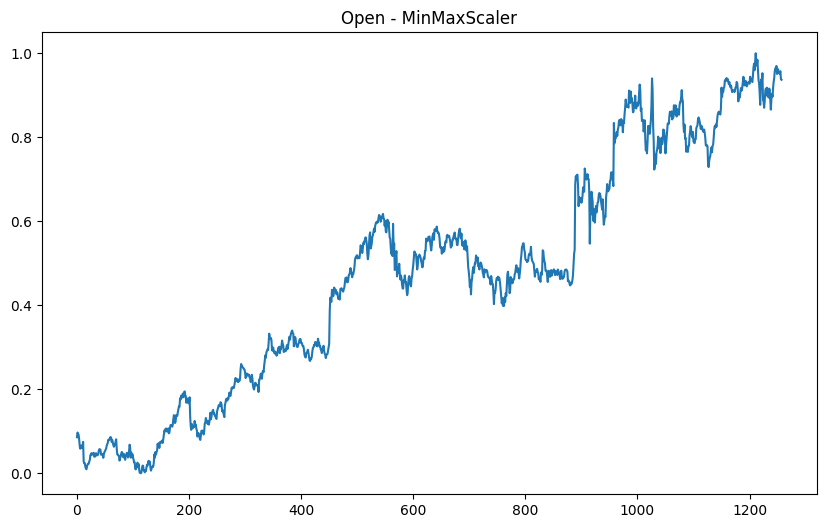

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_scaled)
plt.title('Open - MinMaxScaler')
plt.show()

In [ ]:
# Create Data Structure
X_train = []
y_train = []
# 50 amostras em cada vetor
timesteps = 50
# obtem 1208 conjunto com 50 amostras cada com passo = 1
for i in range(timesteps, len(dataset_train)):
    # X_train = 1208 vetores com 50 amostras cada
    X_train.append(train_scaled[i - timesteps:i, 0])
    # y_train = próximo valor (51) que será o valor futuro
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1208, 50)

In [ ]:
y_train.shape

(1208,)

In [ ]:
train_scaled[0][0]

0.08581367661284323

In [ ]:
X_train[0][0]

0.08581367661284323

In [ ]:
i=50
train_scaled[i - timesteps:i, 0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481])

In [ ]:
train_scaled[i, 0]

0.052143016593496516

In [ ]:
# Create RNN Model

#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras import backend as K

K.clear_session()

#Initialize RNN:
regressor = Sequential(name='RNN')

#Adding the first RNN layer and some Dropout regularization
# return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(SimpleRNN(units = 10, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# #Adding the second RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding the third RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50))
# regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
regressor.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the RNN to the Training set
h=regressor.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 2s 14ms/step - loss: 0.0397 - accuracy: 0.0017
Epoch 2/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0070 - accuracy: 0.0017
Epoch 3/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0029 - accuracy: 0.0017
Epoch 4/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 5/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 6/20
38/38 [==============================] - 1s 16ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 7/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 8/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 9/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 10/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 11/2

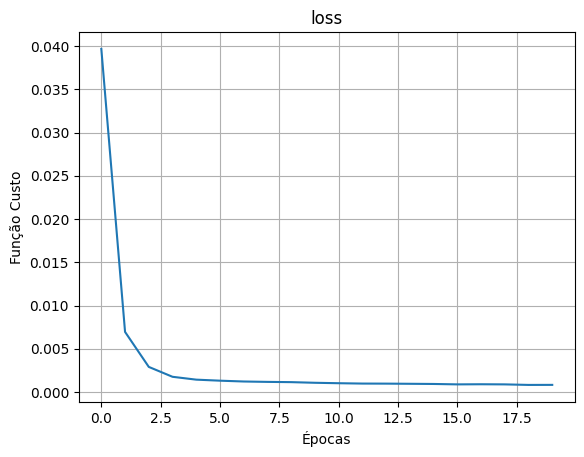

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Função Custo')
plt.title('loss')
plt.grid()
plt.show()

In [ ]:
dataset_total.tail(10)

,Date,Open,High,Low,Close,Volume,date
1268,1/18/2017,805.81,806.21,800.99,806.07,"1,294,400",2017-01-18
1269,1/19/2017,805.12,809.48,801.80,802.17,"919,300",2017-01-19
1270,1/20/2017,806.91,806.91,801.69,805.02,"1,670,000",2017-01-20
1271,1/23/2017,807.25,820.87,803.74,819.31,"1,963,600",2017-01-23
1272,1/24/2017,822.30,825.90,817.82,823.87,"1,474,000",2017-01-24
1273,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500",2017-01-25
1274,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900",2017-01-26
1275,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800",2017-01-27
1276,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600",2017-01-30
1277,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600",2017-01-31


In [ ]:
# load test dataset == last 20 samples of total dataset
dataset_test = dataset_total[-20:]
dataset_test.head(4)

,Date,Open,High,Low,Close,Volume,date
1258,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300",2017-01-03
1259,1/4/2017,788.36,791.34,783.16,786.9,"1,073,000",2017-01-04
1260,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200",2017-01-05
1261,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200",2017-01-06


In [ ]:
# load test dataset == last 20 samples of total dataset
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Stock_Price_Test.csv')
dataset_test.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
len(dataset_test)

20

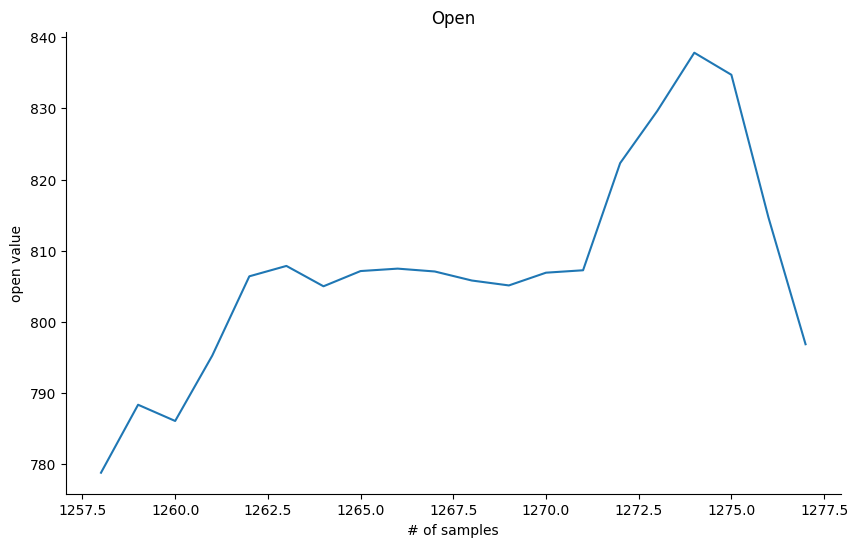

In [ ]:
dataset_test['Open'].plot(kind='line', figsize=(10, 6), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('# of samples')
plt.ylabel('open value')
plt.show()

In [ ]:
# extract 'Open' column of test dataset
real_test_stock_price = dataset_test.loc[:, ['Open']].values
real_test_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
len(real_test_stock_price)

20

In [ ]:
# take just 'Open' column of total dataset
dst = dataset_total['Open']
dst

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1273    829.62
1274    837.81
1275    834.71
1276    814.66
1277    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
# pego as 70 últimas amostras do dataset total (coluna Open) para que eu possa utilizar o
# timesteps = 50 e varrer 20 posições finais do banco de dados
inputs = dst[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs.shape

(70, 1)

In [ ]:
dst[1277]

796.86

In [ ]:
# último dado de inputs == último dado do dst
inputs[69]

array([796.86])

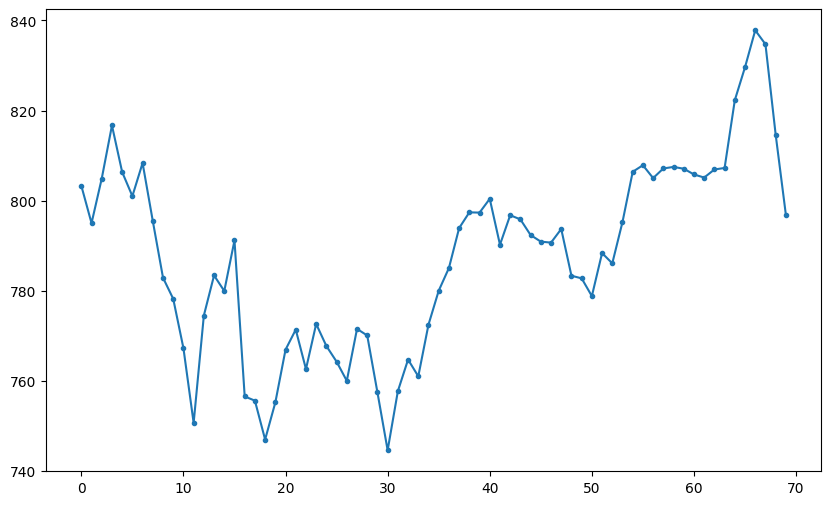

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(inputs, '.-')
plt.show()

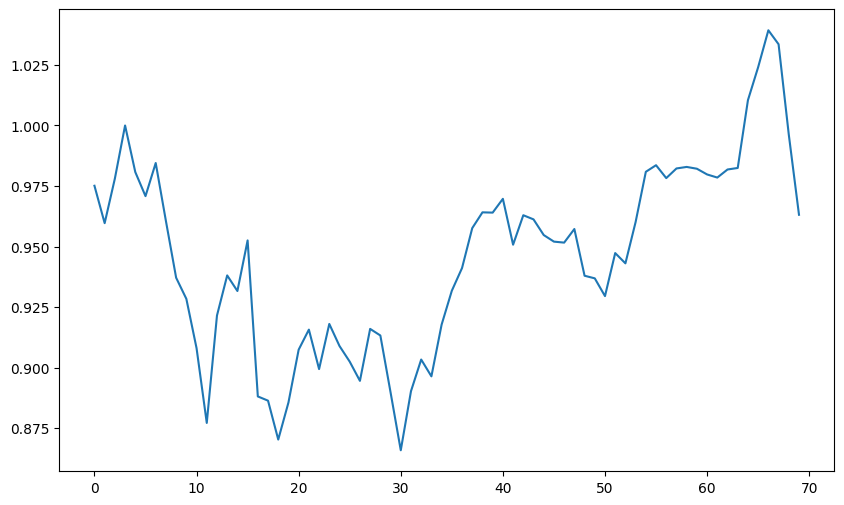

In [ ]:
# aplico minmax scaler que foi utilizado anteriormente, para se manter a proporção de deslocamento original
inputs_sc = scaler.transform(inputs)
plt.figure(figsize=(10, 6))
plt.plot(inputs_sc)
plt.show()

In [ ]:
len(inputs)

70

In [ ]:
# monto a matriz X_test com 20 conjuntos de 50 amostras cada
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs_sc[i-timesteps:i,0])
X_test = np.array(X_test)

In [ ]:
X_test.shape

(20, 50)

In [ ]:
X_test[0]

array([0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
       0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
       0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
       0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
       0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
       0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
       0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
       0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
       0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
       0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146])

In [ ]:
# reshape para ficar compatível com a entrada da rede RNN
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(20, 50, 1)

In [ ]:
# Getting the predicted stock price
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 0s 184ms/step


In [ ]:
predicted_stock_price.shape

(20, 1)

In [ ]:
# reverto a escala para os valores originais
predicted_stock_price_inv = scaler.inverse_transform(predicted_stock_price)

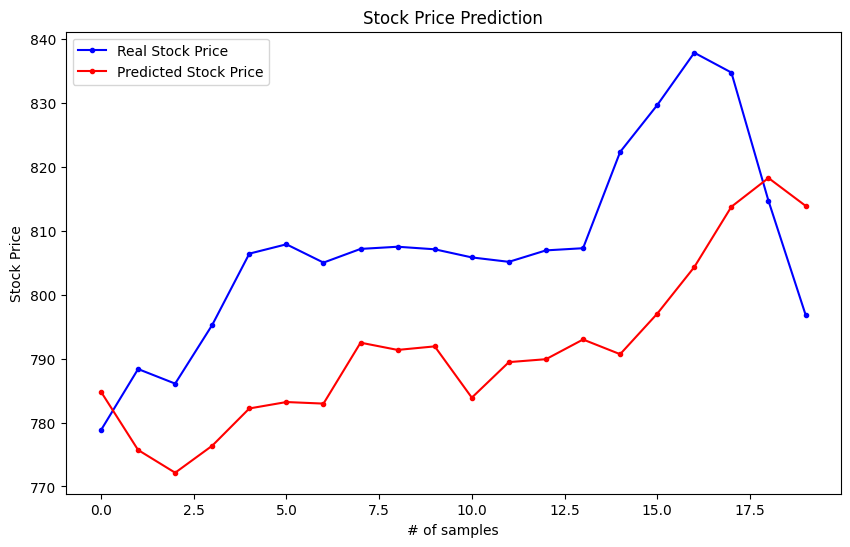

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_test_stock_price, '.-', color='blue', label='Real Stock Price')
plt.plot(predicted_stock_price_inv, '.-', color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('# of samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##Referências
[1] https://github.com/blurred-machine/RNN-based-Stock-Price-Prediction-using-LSTM

[2] https://github.com/drraghavendra/Google-Stock-Price-prediction-using-LSTM/blob/main/README.md

[3] https://www.kaggle.com/code/darkside92/google-stock-price-predict-with-lstm/notebook

[4] https://www.kaggle.com/code/kcsener/8-recurrent-neural-network-rnn-tutorial